In [1]:
# Notebook 1: Classification using Support Vector Machine (SVM) – Iris Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)



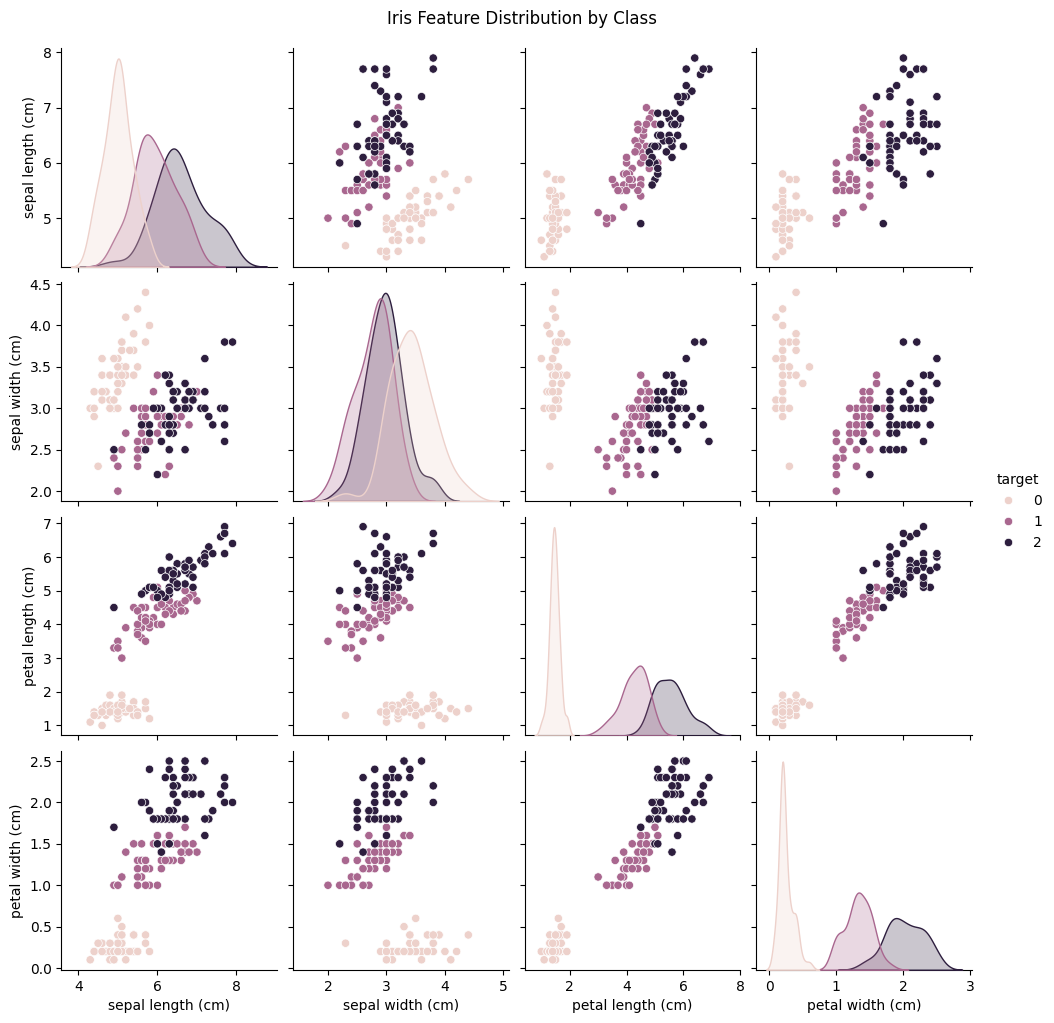

In [3]:
# Step 3: Visualize Dataset
sns.pairplot(pd.concat([X, pd.Series(y, name='target')], axis=1), hue='target')
plt.suptitle("Iris Feature Distribution by Class", y=1.02)
plt.show()



In [4]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [5]:
# Step 5: Train and Evaluate SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))



SVM Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



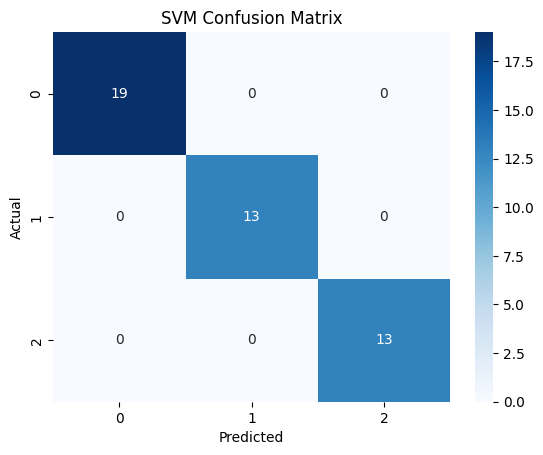

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



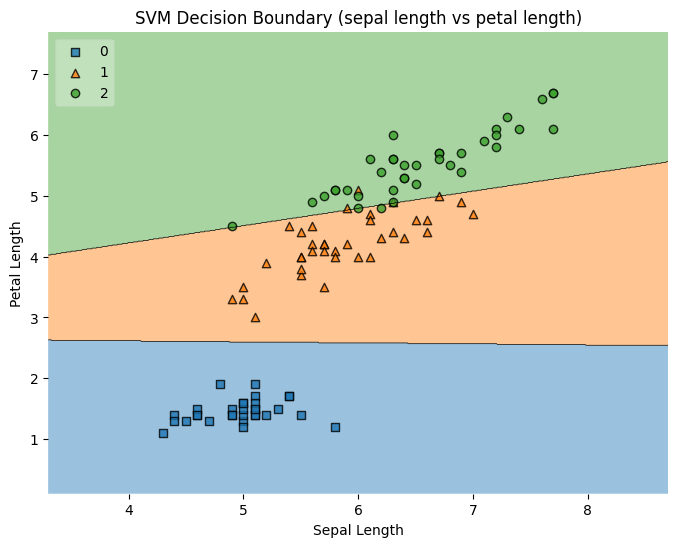

In [9]:
# Visualize Decision Boundary (2 Features Only)
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

X_2d = X.iloc[:, [0, 2]].values  # sepal length and petal length
y_2d = y.values
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

svm2d = SVC(kernel='linear')
svm2d.fit(X_train_2d, y_train_2d)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_2d, y_train_2d, clf=svm2d, legend=2)
plt.title('SVM Decision Boundary (sepal length vs petal length)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()
